

# 1. Define a reserach question
Which Community Districts in NYC show the highest number of complaints?
# 2. Think about what data are available
Find suitable data by searching the CUSP Data Catalog https://datahub.cusp.nyu.edu/catalog. You can use Urban Profiler to investigate the Metadata associated with each dataset. Using this tool will help you to decide which attributes of the data you need to answer your question so you don't have to load the entire dataset.

In [78]:
import os
import pandas as pd
import numpy as np
import re
%pylab inline
PUIdata = os.getenv('PUIDATA')

Populating the interactive namespace from numpy and matplotlib


In [2]:
data = pd.read_csv('/projects/open/NYCOpenData/nycopendata/data/erm2-nwe9/1446832678/erm2-nwe9', usecols = ['Borough', 'Community Board',
                   'Complaint Type', 'Incident Zip', 'Resolution Description','Latitude', 'Longitude','Location'])
data.head()

/opt/rh/anaconda/root/envs/PUI2016_Python2/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Complaint Type,Incident Zip,Resolution Description,Community Board,Borough,Latitude,Longitude,Location
0,Street Condition,11224,NaN,13 BROOKLYN,BROOKLYN,40.573431,-73.991742,"(40.57343122248129, -73.99174247588253)"
1,Opinion for the Mayor,NaN,Your comments have been submitted to the Mayor...,0 Unspecified,Unspecified,NaN,NaN,NaN
2,Root/Sewer/Sidewalk Condition,11234,The Department of Parks and Recreation usually...,18 BROOKLYN,BROOKLYN,40.625004,-73.920726,"(40.62500363580505, -73.92072558378698)"
3,Illegal Parking,11218,Your complaint has been received by the Police...,12 BROOKLYN,BROOKLYN,40.634522,-73.974790,"(40.634522428879706, -73.97479041437481)"
4,Benefit Card Replacement,NaN,The Human Resources Administration received yo...,0 Unspecified,Unspecified,NaN,NaN,NaN


# 3. Think about possible measurement errors
Do you see any problems regarding possible measurement error? Think about who is represented in the data, ommissions, duplications, content error, missing data, etc.

In [3]:
# Check if all Boroughs and Community Districts are represented in the Data 
# How many unique values do we have? 
print len(data['Community Board'].unique())


77


In [4]:
print len(data['Borough'].unique())

6


In [5]:
# Why do we have so many? Some of them are unspecified, missing. Some might be invalid entries. 
# We should have 59 Community Districts.

data = data[~data['Community Board'].str.contains("Unspecified")]

In [6]:
print len(data['Community Board'].unique())


71


In [7]:
print len(data.drop_duplicates())

4692092


In [8]:
data.isnull().sum()

Complaint Type                  0
Incident Zip                20426
Resolution Description    3024464
Community Board                 0
Borough                         0
Latitude                    85519
Longitude                   85519
Location                    85519
dtype: int64

In [9]:
data['Resolution Description'].fillna(data['Complaint Type'], inplace = True) #fill the missing value

In [10]:
data['Community Board'].drop_duplicates().as_matrix()

array(['13 BROOKLYN', '18 BROOKLYN', '12 BROOKLYN', '02 STATEN ISLAND',
       '08 MANHATTAN', '06 BROOKLYN', '10 BRONX', '06 MANHATTAN',
       '04 BROOKLYN', '04 QUEENS', '09 MANHATTAN', '14 BROOKLYN',
       '05 MANHATTAN', '02 MANHATTAN', '10 QUEENS', '07 QUEENS',
       '02 QUEENS', '11 BROOKLYN', '05 QUEENS', '05 BROOKLYN', '09 QUEENS',
       '12 MANHATTAN', '01 BROOKLYN', '11 MANHATTAN', '03 BRONX',
       '03 STATEN ISLAND', '08 BROOKLYN', '03 BROOKLYN', '07 MANHATTAN',
       '10 MANHATTAN', '04 BRONX', '01 MANHATTAN', '07 BRONX', '09 BRONX',
       '03 MANHATTAN', '13 QUEENS', '02 BRONX', '12 QUEENS', '16 BROOKLYN',
       '08 QUEENS', '04 MANHATTAN', '14 QUEENS', '10 BROOKLYN',
       '11 QUEENS', '06 BRONX', '08 BRONX', '05 BRONX', '15 BROOKLYN',
       '02 BROOKLYN', '12 BRONX', '03 QUEENS', '06 QUEENS',
       '01 STATEN ISLAND', '01 BRONX', '01 QUEENS', '17 BROOKLYN',
       '11 BRONX', '09 BROOKLYN', '07 BROOKLYN', '64 MANHATTAN',
       '81 QUEENS', '55 BROOKLYN', '83

In [11]:
data = data[data['Community Board'].str.contains('64') != True]
data = data[data['Community Board'].str.contains('55') != True]
data = data[data['Community Board'].str.contains('26') != True]
data = data[data['Community Board'].str.contains('84') != True]
data = data[data['Community Board'].str.contains('95') != True]
data = data[data['Community Board'].str.contains('81') != True]
data = data[data['Community Board'].str.contains('82') != True]
data = data[data['Community Board'].str.contains('83') != True]
data = data[data['Community Board'].str.contains('80') != True]
data = data[data['Community Board'].str.contains('27') != True]
data = data[data['Community Board'].str.contains('28') != True]
data = data[data['Community Board'].str.contains('56') != True]

In [12]:
data['Community Board'].drop_duplicates().as_matrix()

array(['13 BROOKLYN', '18 BROOKLYN', '12 BROOKLYN', '02 STATEN ISLAND',
       '08 MANHATTAN', '06 BROOKLYN', '10 BRONX', '06 MANHATTAN',
       '04 BROOKLYN', '04 QUEENS', '09 MANHATTAN', '14 BROOKLYN',
       '05 MANHATTAN', '02 MANHATTAN', '10 QUEENS', '07 QUEENS',
       '02 QUEENS', '11 BROOKLYN', '05 QUEENS', '05 BROOKLYN', '09 QUEENS',
       '12 MANHATTAN', '01 BROOKLYN', '11 MANHATTAN', '03 BRONX',
       '03 STATEN ISLAND', '08 BROOKLYN', '03 BROOKLYN', '07 MANHATTAN',
       '10 MANHATTAN', '04 BRONX', '01 MANHATTAN', '07 BRONX', '09 BRONX',
       '03 MANHATTAN', '13 QUEENS', '02 BRONX', '12 QUEENS', '16 BROOKLYN',
       '08 QUEENS', '04 MANHATTAN', '14 QUEENS', '10 BROOKLYN',
       '11 QUEENS', '06 BRONX', '08 BRONX', '05 BRONX', '15 BROOKLYN',
       '02 BROOKLYN', '12 BRONX', '03 QUEENS', '06 QUEENS',
       '01 STATEN ISLAND', '01 BRONX', '01 QUEENS', '17 BROOKLYN',
       '11 BRONX', '09 BROOKLYN', '07 BROOKLYN'], dtype=object)

In [13]:
print len(data['Community Board'].drop_duplicates().as_matrix())

59


In [14]:
data_dup = data[data.duplicated()]

In [15]:
data_dup.head()

,Complaint Type,Incident Zip,Resolution Description,Community Board,Borough,Latitude,Longitude,Location
9,Noise - Commercial,11231,The Police Department responded to the complai...,06 BROOKLYN,BROOKLYN,40.682614,-73.993240,"(40.682613541568664, -73.99323966551619)"
38,Blocked Driveway,11221,The Police Department issued a summons in resp...,04 BROOKLYN,BROOKLYN,40.696368,-73.928737,"(40.69636767790248, -73.92873677664315)"
50,Illegal Parking,10308,Your complaint has been received by the Police...,03 STATEN ISLAND,STATEN ISLAND,40.561264,-74.154741,"(40.5612638604385, -74.15474107627114)"
54,Illegal Parking,10308,Your complaint has been received by the Police...,03 STATEN ISLAND,STATEN ISLAND,40.561264,-74.154741,"(40.5612638604385, -74.15474107627114)"
117,Noise - Commercial,10040,The Police Department responded to the complai...,12 MANHATTAN,MANHATTAN,40.859324,-73.931237,"(40.85932419390543, -73.93123733660875)"


In [16]:
data_community = data_dup.groupby(['Community Board'])

In [17]:
complaints = data_community.count().iloc[:,0].sort_values(ascending = False)
complaints.head()

Community Board
12 MANHATTAN    153547
07 BRONX        104388
04 BRONX        104326
14 BROOKLYN      90667
05 BRONX         90000
Name: Complaint Type, dtype: int64

In [18]:
df_complaints = pd.DataFrame(complaints)
df_complaints.reset_index(inplace = True)
df_complaints.head()

,Community Board,Complaint Type
0,12 MANHATTAN,153547
1,07 BRONX,104388
2,04 BRONX,104326
3,14 BROOKLYN,90667
4,05 BRONX,90000


In [19]:
df_complaints['Rank Level'] = df_complaints['Community Board'].rank(ascending=False)

In [20]:
df_complaints.sort(columns = 'Rank Level').head()

/opt/rh/anaconda/root/envs/PUI2016_Python2/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


,Community Board,Complaint Type,Rank Level
35,18 BROOKLYN,48766,1.0
5,17 BROOKLYN,89954,2.0
53,16 BROOKLYN,35859,3.0
30,15 BROOKLYN,53801,4.0
41,14 QUEENS,42552,5.0


# 4. Think about the interpretation of your results?
What do you have to keep in mind when interpreting your results? Are they generable? Does the way the data is collected influence your results? To better inform city agancies it might be good to explore in more detail the underlying dempgraphics/infrastructure of a Community District becasue this might influence 311 calls. You can do this by merging external data on the Community District level to your analysis data.

In [21]:
df_pop = pd.read_csv(PUIdata + "/Final_Demographics.csv")
df_pop.count()

FIPS                                                                                                                                                              59
cd_id                                                                                                                                                             59
Total Population                                                                                                                                                  59
Population Density (per sq. mile)                                                                                                                                 59
% Total Population: Male                                                                                                                                          59
% Total Population: 18 to 24 Years                                                                                                                                59
% Total Po

In [22]:
df_pop.head()

,FIPS,cd_id,Total Population,Population Density (per sq. mile),% Total Population: Male,% Total Population: 18 to 24 Years,% Total Population: 25 to 34 Years,% Total Population: 35 to 44 Years,% Population 5 Years And Over: Speak Only English,% Population 5 Years And Over: Spanish or Spanish Creole,...,"Employed Civilian Population 16 Years And Over: Production, transportation, and material moving occupations: Production occupations","Employed Civilian Population 16 Years And Over: Production, transportation, and material moving occupations: Transportation and material moving occupations","% Employed Civilian Population 16 Years And Over: Management, professional, and related occupations",% Employed Civilian Population 16 Years And Over: Service occupations,% Employed Civilian Population 16 Years And Over: Sales and office occupations,"% Employed Civilian Population 16 Years And Over: Farming, fishing, and forestry occupations","% Employed Civilian Population 16 Years And Over: Construction, extraction, and maintenance occupations","% Employed Civilian Population 16 Years And Over: Production, transportation, and material moving occupations","% Employed Civilian Population 16 Years And Over: Production, transportation, and material moving occupations: Production occupations","% Employed Civilian Population 16 Years And Over: Production, transportation, and material moving occupations: Transportation and material moving occupations"
0,3603701,BX08,106737,31229.95006,46.65,10.73,15.04,11.32,46.80,39.24,...,665,1518,42.66,28.95,20.89,0.24,2.65,4.60,1.40,3.20
1,3603702,BX12,134644,19966.67839,46.35,11.35,14.29,12.57,73.09,18.19,...,1156,4174,29.57,33.98,20.40,0.00,7.08,8.97,1.95,7.02
2,3603703,BX10,121209,12913.81703,45.20,8.62,13.74,12.78,61.79,26.43,...,941,3433,36.20,22.85,25.09,0.00,7.68,8.18,1.76,6.42
3,3603704,BX11,135839,35677.95453,50.09,8.10,17.43,14.09,43.22,36.45,...,2189,5592,30.06,27.86,22.24,0.00,7.03,12.81,3.60,9.20
4,3603705,BX03,172247,39405.79222,44.72,14.24,14.89,12.38,36.82,54.24,...,1437,5436,16.80,41.00,22.29,0.03,8.45,11.43,2.39,9.04


In [23]:
len(df_pop['cd_id'].unique())

59

In [24]:
print 'The number of community districts: %d ' % len(df_pop['cd_id'].unique())

The number of community districts: 59 


In [25]:
# Manipulate data to get some information on demographics by Community District. 
# Think about who might be more likely to call 311

In [26]:
dfpop2 = df_pop[['cd_id', 'Employed Civilian Population 16 Years And Over: Service occupations']]

In [27]:
dfpop2.sort_values(by = 'Employed Civilian Population 16 Years And Over: Service occupations')

,cd_id,Employed Civilian Population 16 Years And Over: Service occupations
22,MN01,4259
23,MN02,4259
31,BK06,4700
20,MN06,5386
16,MN08,6305
52,QN06,7673
19,MN04,8372
18,MN05,8372
48,QN11,8728
17,MN07,8974


In [28]:
# Save data frame
df_pop.head()

,FIPS,cd_id,Total Population,Population Density (per sq. mile),% Total Population: Male,% Total Population: 18 to 24 Years,% Total Population: 25 to 34 Years,% Total Population: 35 to 44 Years,% Population 5 Years And Over: Speak Only English,% Population 5 Years And Over: Spanish or Spanish Creole,...,"Employed Civilian Population 16 Years And Over: Production, transportation, and material moving occupations: Production occupations","Employed Civilian Population 16 Years And Over: Production, transportation, and material moving occupations: Transportation and material moving occupations","% Employed Civilian Population 16 Years And Over: Management, professional, and related occupations",% Employed Civilian Population 16 Years And Over: Service occupations,% Employed Civilian Population 16 Years And Over: Sales and office occupations,"% Employed Civilian Population 16 Years And Over: Farming, fishing, and forestry occupations","% Employed Civilian Population 16 Years And Over: Construction, extraction, and maintenance occupations","% Employed Civilian Population 16 Years And Over: Production, transportation, and material moving occupations","% Employed Civilian Population 16 Years And Over: Production, transportation, and material moving occupations: Production occupations","% Employed Civilian Population 16 Years And Over: Production, transportation, and material moving occupations: Transportation and material moving occupations"
0,3603701,BX08,106737,31229.95006,46.65,10.73,15.04,11.32,46.80,39.24,...,665,1518,42.66,28.95,20.89,0.24,2.65,4.60,1.40,3.20
1,3603702,BX12,134644,19966.67839,46.35,11.35,14.29,12.57,73.09,18.19,...,1156,4174,29.57,33.98,20.40,0.00,7.08,8.97,1.95,7.02
2,3603703,BX10,121209,12913.81703,45.20,8.62,13.74,12.78,61.79,26.43,...,941,3433,36.20,22.85,25.09,0.00,7.68,8.18,1.76,6.42
3,3603704,BX11,135839,35677.95453,50.09,8.10,17.43,14.09,43.22,36.45,...,2189,5592,30.06,27.86,22.24,0.00,7.03,12.81,3.60,9.20
4,3603705,BX03,172247,39405.79222,44.72,14.24,14.89,12.38,36.82,54.24,...,1437,5436,16.80,41.00,22.29,0.03,8.45,11.43,2.39,9.04


In [29]:
# Infrastructure by Community District
df_infr = pd.read_csv(PUIdata + "/ACS_Computer_Use_and_Internet_2014_1Year_Estimate.csv")

In [30]:
df_infr.count()

FIPS                                                       59
Geographic Identifier                                      59
Qualifying Name                                            59
Households                                                 59
Households: With An Internet Subscription                  59
Households: Dial-Up Alone                                  59
Households: Dsl                                            59
Households: With Mobile Broadband                          59
Households: Without Mobile Broadband                       59
Households: Cable Modem                                    59
Households: With Mobile Broadband.1                        59
Households: Without Mobile Broadband.1                     59
Households: Fiber-Optic                                    59
Households: With Mobile Broadband.2                        59
Households: Without Mobile Broadband.2                     59
Households: Satellite Internet Service                     59
Househol

In [31]:
df_infr.head()

,FIPS,Geographic Identifier,Qualifying Name,Households,Households: With An Internet Subscription,Households: Dial-Up Alone,Households: Dsl,Households: With Mobile Broadband,Households: Without Mobile Broadband,Households: Cable Modem,...,Households: Mobile Broadband Alone or With Dialup,Households: Internet Access Without A Subscription,Households: No Internet Access,% Households: With An Internet Subscription,Households.1,Households: Has A Computer,Households: With Dial-Up Internet Subscription Alone,Households: With A Broadband Internet Subscription,Households: Without An Internet Subscription,Households: No Computer
0,3603701,79500US3603701,"NYC-Bronx Community District 8--Riverdale, New...",42035,31795,444,2813,946,1867,19178,...,2168,2119,8121,75.64,42035,35048,404,30943,3701,6987
1,3603702,79500US3603702,"NYC-Bronx Community District 12--Wakefield, Ne...",44830,32243,178,849,405,444,18653,...,928,1891,10696,71.92,44830,36700,178,31435,5087,8130
2,3603703,79500US3603703,"NYC-Bronx Community District 10--Co-op City, N...",47050,32729,158,1863,398,1465,20044,...,639,2882,11439,69.56,47050,38700,158,32333,6209,8350
3,3603704,79500US3603704,NYC-Bronx Community District 11--Pelham Parkwa...,44922,32003,141,1478,474,1004,17917,...,1001,2722,10197,71.24,44922,37237,122,31278,5837,7685
4,3603705,79500US3603705,"NYC-Bronx Community District 3 & 6--Belmont, N...",57556,35503,88,1297,651,646,15847,...,1385,3312,18741,61.68,57556,42576,88,33408,9080,14980


In [32]:
# How many community districts are in file? 

df_infr = df_infr.replace(['NYC-Bronx Community District 8--Riverdale, New York',
       'NYC-Bronx Community District 12--Wakefield, New York',
       'NYC-Bronx Community District 10--Co-op City, New York',
       'NYC-Bronx Community District 11--Pelham Parkway, New York',
       'NYC-Bronx Community District 3 & 6--Belmont, New York',
       'NYC-Bronx Community District 7--Bedford Park, New York',
       'NYC-Bronx Community District 5--Morris Heights, New York',
       'NYC-Bronx Community District 4--Concourse, New York',
       'NYC-Bronx Community District 9--Castle Hill, New York',
       'NYC-Bronx Community District 1 & 2--Hunts Point, New York',
       'NYC-Manhattan Community District 12--Washington Heights, New York',
       'NYC-Manhattan Community District 9--Hamilton Heights, New York',
       'NYC-Manhattan Community District 10--Central Harlem PUMA, New York',
       'NYC-Manhattan Community District 11--East Harlem PUMA, New York',
       'NYC-Manhattan Community District 8--Upper East Side PUMA, New York',
       'NYC-Manhattan Community District 7--Upper West Side & West Side PUMA, New York',
       'NYC-Manhattan Community District 4 & 5--Chelsea, New York',
       'NYC-Manhattan Community District 6--Murray Hill, New York',
       'NYC-Manhattan Community District 3--Chinatown & Lower East Side PUMA, New York',
       'NYC-Manhattan Community District 1 & 2--Battery Park City, New York',
       'NYC-Staten Island Community District 3--Tottenville, New York',
       'NYC-Staten Island Community District 2--New Springville & South Beach PUMA, New York',
       'NYC-Staten Island Community District 1--Port Richmond, New York',
       'NYC-Brooklyn Community District 1--Greenpoint & Williamsburg PUMA, New York',
       'NYC-Brooklyn Community District 4--Bushwick PUMA, New York',
       'NYC-Brooklyn Community District 3--Bedford-Stuyvesant PUMA, New York',
       'NYC-Brooklyn Community District 2--Brooklyn Heights & Fort Greene PUMA, New York',
       'NYC-Brooklyn Community District 6--Park Slope, New York',
       'NYC-Brooklyn Community District 8--Crown Heights North & Prospect Heights PUMA, New York',
       'NYC-Brooklyn Community District 16--Brownsville & Ocean Hill PUMA, New York',
       'NYC-Brooklyn Community District 5--East New York & Starrett City PUMA, New York',
       'NYC-Brooklyn Community District 18--Canarsie & Flatlands PUMA, New York',
       'NYC-Brooklyn Community District 17--East Flatbush, New York',
       'NYC-Brooklyn Community District 9--Crown Heights South, New York',
       'NYC-Brooklyn Community District 7--Sunset Park & Windsor Terrace PUMA, New York',
       'NYC-Brooklyn Community District 10--Bay Ridge & Dyker Heights PUMA, New York',
       'NYC-Brooklyn Community District 12--Borough Park, New York',
       'NYC-Brooklyn Community District 14--Flatbush & Midwood PUMA, New York',
       'NYC-Brooklyn Community District 15--Sheepshead Bay, New York',
       'NYC-Brooklyn Community District 11--Bensonhurst & Bath Beach PUMA, New York',
       'NYC-Brooklyn Community District 13--Brighton Beach & Coney Island PUMA, New York',
       'NYC-Queens Community District 1--Astoria & Long Island City PUMA, New York',
       'NYC-Queens Community District 3--Jackson Heights & North Corona PUMA, New York',
       'NYC-Queens Community District 7--Flushing, New York',
       'NYC-Queens Community District 11--Bayside, New York',
       'NYC-Queens Community District 13--Queens Village, New York',
       'NYC-Queens Community District 8--Briarwood, New York',
       'NYC-Queens Community District 4--Elmhurst & South Corona PUMA, New York',
       'NYC-Queens Community District 6--Forest Hills & Rego Park PUMA, New York',
       'NYC-Queens Community District 2--Sunnyside & Woodside PUMA, New York',
       'NYC-Queens Community District 5--Ridgewood, New York',
       'NYC-Queens Community District 9--Richmond Hill & Woodhaven PUMA, New York',
       'NYC-Queens Community District 12--Jamaica, New York',
       'NYC-Queens Community District 10--Howard Beach & Ozone Park PUMA, New York',
       'NYC-Queens Community District 14--Far Rockaway, New York'], ['BX08', 'BX12', 'BX10', 'BX11', 'BX06', 'BX07', 'BX05', 'BX04', 'BX09', 'BX02',
'MN12', 'MN09', 'MN10', 'MN11', 'MN08', 'MN07', 'MN04', 'MN06', 'MN03', 'MN01',
'SI03', 'SI02', 'SI01', 'BK01', 'BK04', 'BK03', 'BK02', 'BK06', 'BK08', 'BK16', 'BK05', 'BK18',
'BK17', 'BK09', 'BK07', 'BK10', 'BK12', 'BK14', 'BK15', 'BK11', 'BK13', 'QN01', 'QN03', 'QN07',
'QN11', 'QN13', 'QN08', 'QN04', 'QN06', 'QN02', 'QN05', 'QN09', 'QN12', 'QN10', 'QN14'])

In [33]:
df_infr = df_infr.rename(columns= {'Qualifying Name' : 'Community Board Name'})

In [34]:
df_infr.head()

,FIPS,Geographic Identifier,Community Board Name,Households,Households: With An Internet Subscription,Households: Dial-Up Alone,Households: Dsl,Households: With Mobile Broadband,Households: Without Mobile Broadband,Households: Cable Modem,...,Households: Mobile Broadband Alone or With Dialup,Households: Internet Access Without A Subscription,Households: No Internet Access,% Households: With An Internet Subscription,Households.1,Households: Has A Computer,Households: With Dial-Up Internet Subscription Alone,Households: With A Broadband Internet Subscription,Households: Without An Internet Subscription,Households: No Computer
0,3603701,79500US3603701,BX08,42035,31795,444,2813,946,1867,19178,...,2168,2119,8121,75.64,42035,35048,404,30943,3701,6987
1,3603702,79500US3603702,BX12,44830,32243,178,849,405,444,18653,...,928,1891,10696,71.92,44830,36700,178,31435,5087,8130
2,3603703,79500US3603703,BX10,47050,32729,158,1863,398,1465,20044,...,639,2882,11439,69.56,47050,38700,158,32333,6209,8350
3,3603704,79500US3603704,BX11,44922,32003,141,1478,474,1004,17917,...,1001,2722,10197,71.24,44922,37237,122,31278,5837,7685
4,3603705,79500US3603705,BX06,57556,35503,88,1297,651,646,15847,...,1385,3312,18741,61.68,57556,42576,88,33408,9080,14980


In [36]:
len(df_infr['Community Board Name'].drop_duplicates())

55

In [55]:
# Aggregate the mobile subscription data
mobiledata = df_infr.iloc[:,[2,7,10,13,16,19,21]]

In [56]:
mobiledata['Households mobile subscription'] = mobiledata.sum(axis = 1)

mobiledata.head()

/opt/rh/anaconda/root/envs/PUI2016_Python2/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


,Community Board Name,Households: With Mobile Broadband,Households: With Mobile Broadband.1,Households: With Mobile Broadband.2,Households: With Mobile Broadband.3,Households: With Mobile Broadband.4,Households: Mobile Broadband Alone or With Dialup,Households mobile subscription
0,BX08,946,10433,433,37,3510,2168,17527
1,BX12,405,5577,2358,0,2146,928,11414
2,BX10,398,6377,1200,0,3450,639,12064
3,BX11,474,5624,2272,241,2137,1001,11749
4,BX06,651,6690,695,111,6760,1385,16292


In [58]:
mobiledata = mobiledata[['Community Board Name', 'Households mobile subscription']]
mobiledata.head()

,Community Board Name,Households mobile subscription
0,BX08,17527
1,BX12,11414
2,BX10,12064
3,BX11,11749
4,BX06,16292


In [39]:
# Aggregate internet type by high and low connections
internetdataL = df_infr.iloc[:,[2,5,21,22]]
internetdataL['Households with Low Connection'] = internetdataL.sum(axis = 1)
internetdataL.head()

/opt/rh/anaconda/root/envs/PUI2016_Python2/lib/python2.7/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


,Community Board Name,Households: Dial-Up Alone,Households: Mobile Broadband Alone or With Dialup,Households: Internet Access Without A Subscription,Households with Low Connection
0,BX08,444,2168,2119,4731
1,BX12,178,928,1891,2997
2,BX10,158,639,2882,3679
3,BX11,141,1001,2722,3864
4,BX06,88,1385,3312,4785


In [40]:
internetdataH = df_infr.iloc[:,[2,6,9,12,15,18]]
internetdataH['Households with High Connection'] = internetdataH.sum(axis = 1)
internetdataH.head()

/opt/rh/anaconda/root/envs/PUI2016_Python2/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


,Community Board Name,Households: Dsl,Households: Cable Modem,Households: Fiber-Optic,Households: Satellite Internet Service,"Households: Two or More Fixed Broadband Types, or Other",Households with High Connection
0,BX08,2813,19178,939,75,6178,29183
1,BX12,849,18653,6216,131,5288,31137
2,BX10,1863,20044,3490,0,6535,31932
3,BX11,1478,17917,5435,308,5723,30861
4,BX06,1297,15847,1510,194,15182,34030


In [41]:
# Save data frame
internetTotal = pd.merge(internetdataL,internetdataH, on = 'Community Board Name' )
internetTotal.head()

,Community Board Name,Households: Dial-Up Alone,Households: Mobile Broadband Alone or With Dialup,Households: Internet Access Without A Subscription,Households with Low Connection,Households: Dsl,Households: Cable Modem,Households: Fiber-Optic,Households: Satellite Internet Service,"Households: Two or More Fixed Broadband Types, or Other",Households with High Connection
0,BX08,444,2168,2119,4731,2813,19178,939,75,6178,29183
1,BX12,178,928,1891,2997,849,18653,6216,131,5288,31137
2,BX10,158,639,2882,3679,1863,20044,3490,0,6535,31932
3,BX11,141,1001,2722,3864,1478,17917,5435,308,5723,30861
4,BX06,88,1385,3312,4785,1297,15847,1510,194,15182,34030


In [43]:
internetTotal = internetTotal[['Community Board Name', 'Households with Low Connection', 'Households with High Connection']]

In [44]:
internetTotal.head()

,Community Board Name,Households with Low Connection,Households with High Connection
0,BX08,4731,29183
1,BX12,2997,31137
2,BX10,3679,31932
3,BX11,3864,30861
4,BX06,4785,34030


# 5. Inform your results by linking datasets
Now you want to link the three data frames to produce summary statistics for Community Districts which show a high number of complaints vs. Community Districts which show a lower number of complaints. Please keep in mind that the identifiers used for the linkage (Community Dostrict IDs) should be recored the same way. Use regular expressions to harmonize the identifiers if possible. The identifiers should look like BK01, BK02, etc. https://docs.python.org/2/library/re.html

In [59]:
# Harmonize the dataframes
df_complaints = df_complaints.replace(['13 QUEENS', '12 BRONX', '03 QUEENS', '12 MANHATTAN',
       '09 MANHATTAN', '08 QUEENS', '01 QUEENS', '07 BRONX', '01 BROOKLYN',
       '03 MANHATTAN', '09 QUEENS', '05 BRONX', '03 BROOKLYN',
       '07 MANHATTAN', '12 BROOKLYN', '09 BROOKLYN', '07 QUEENS',
       '15 BROOKLYN', '08 MANHATTAN', '10 BROOKLYN', '08 BROOKLYN',
       '04 MANHATTAN', '02 MANHATTAN', '12 QUEENS', '04 BRONX',
       '04 BROOKLYN', '01 BRONX', '10 QUEENS', '18 BROOKLYN',
       '11 BROOKLYN', '10 MANHATTAN', '11 QUEENS', '16 BROOKLYN',
       '05 BROOKLYN', '05 MANHATTAN', '08 BRONX', '09 BRONX',
       '17 BROOKLYN', '01 MANHATTAN', '05 QUEENS', '06 QUEENS', '02 BRONX',
       '11 BRONX', '04 QUEENS', '02 QUEENS', '01 STATEN ISLAND',
       '03 STATEN ISLAND', '14 BROOKLYN', '07 BROOKLYN',
       '02 STATEN ISLAND', '10 BRONX', '11 MANHATTAN', '06 BROOKLYN',
       '13 BROOKLYN', '06 MANHATTAN', '02 BROOKLYN', '06 BRONX',
       '14 QUEENS', '03 BRONX'], ['QN13', 'BX12', 'QN03', 'MN12', 'MN09', 'QN08', 'QN01', 'BX07', 'BK01',
        'MN03', 'QN09', 'BX05', 'BK03', 'MN07', 'BK12', 'BK09', 'QN07', 'BK15', 'MN08', 'BK10', 'BK08', 'MN04',
        'MN02', 'QN12', 'BX04', 'BK04', 'BX01', 'QN10', 'BK18', 'BK11', 'MN10', 'QN11', 'BK16', 'BK05', 'MN05',
        'BX08', 'BX09', 'BK17', 'MN01', 'QN05', 'QN06', 'BX02', 'BX11', 'QN04', 'QN02', 'SI01', 'SI03', 'BK14',
        'BK07', 'SI02', 'BX10', 'MN11', 'BK06', 'BK13', 'MN06', 'BK02', 'BX06', 'QN14', 'BX03'])

In [61]:
df_complaints = df_complaints.rename(columns= {'Community Board' : 'Community Board Name'})

In [63]:
df_complaints = df_complaints[['Community Board Name', 'Complaint Type']]
df_complaints.head()

,Community Board Name,Complaint Type
0,MN12,153547
1,BX07,104388
2,BX04,104326
3,BK14,90667
4,BX05,90000


In [67]:
dfpop2 = dfpop2.rename(columns= {'cd_id' : 'Community Board Name'})
dfpop2.head()

,Community Board Name,Employed Civilian Population 16 Years And Over: Service occupations
0,BX08,13731
1,BX12,20194
2,BX10,12224
3,BX11,16927
4,BX03,24652


In [71]:
# Link the 3 dataframes
complaintsM = df_complaints.merge(internetTotal,on='Community Board Name',how='outer').merge(mobiledata,on='Community Board Name',how='outer').merge(
                                 dfpop2,on='Community Board Name',how='outer')

In [73]:
complaintsM.head()

,Community Board Name,Complaint Type,Households with Low Connection,Households with High Connection,Households mobile subscription,Employed Civilian Population 16 Years And Over: Service occupations
0,MN12,153547.0,7016.0,52061.0,26592.0,34219.0
1,BX07,104388.0,6279.0,29844.0,16709.0,18299.0
2,BX04,104326.0,6391.0,26686.0,18342.0,19643.0
3,BK14,90667.0,4053.0,43202.0,16540.0,20265.0
4,BX05,90000.0,4096.0,25216.0,15857.0,20289.0


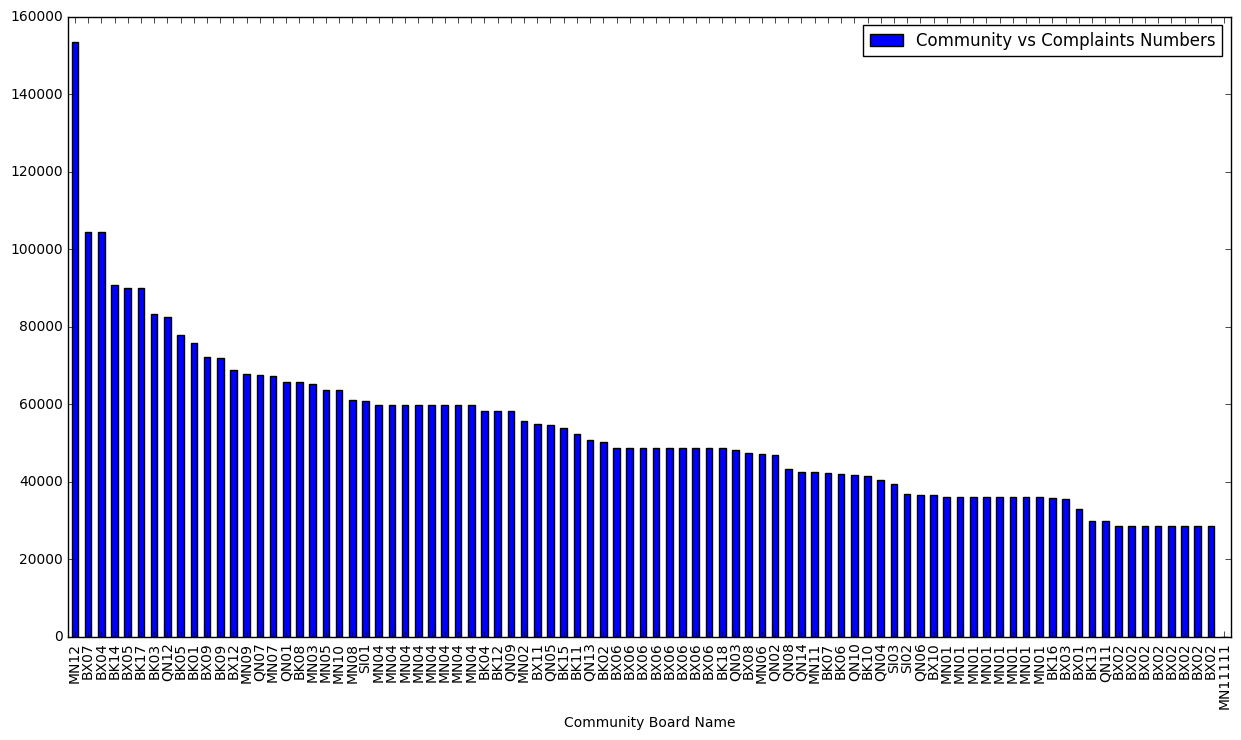

In [83]:
# Are the demographics and infrastructure different in Community Districts that show more complaints than others?
complaintsM.plot(x = 'Community Board Name', y = 'Complaint Type', kind='bar', figsize=(15, 8), label= 'Community vs Complaints Numbers')

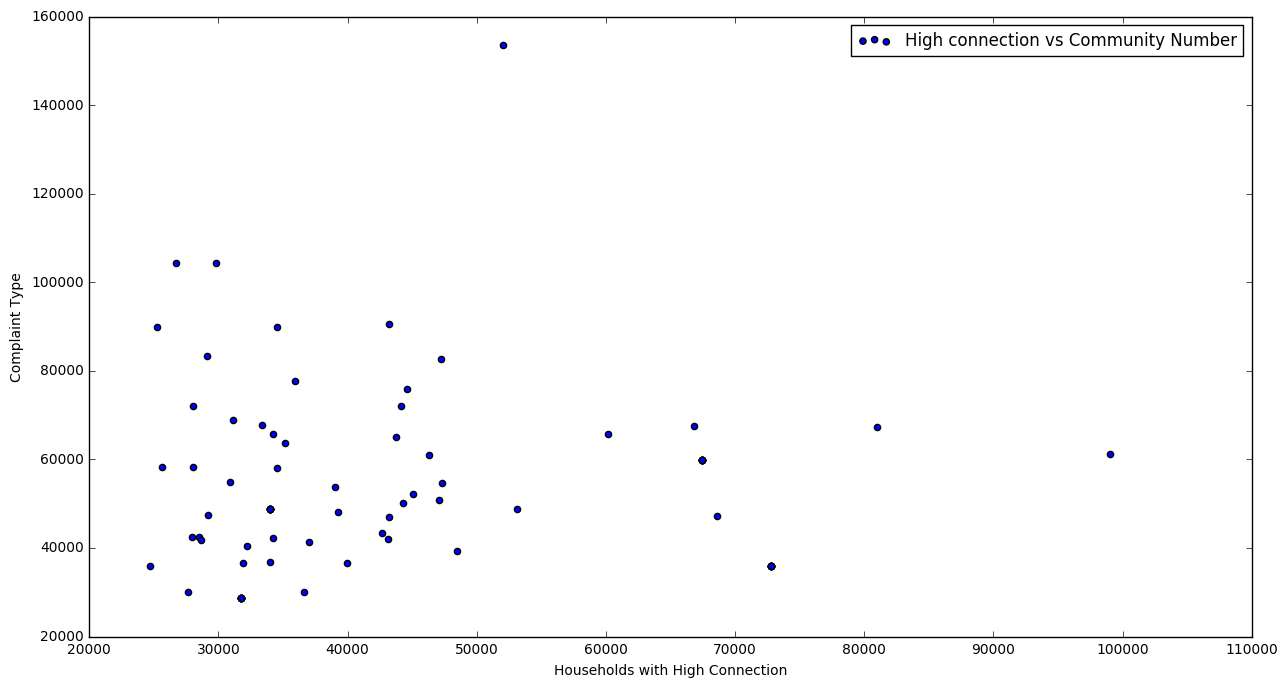

In [84]:
complaintsM.plot(x = 'Households with High Connection', y = 'Complaint Type', kind='scatter', figsize=(15, 8), label= 'High connection vs Community Number')

### From the above plots we can find which community has most complaints and the second plot shows the rough relationship between the households with high connection and complaints numbers.